In [ ]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 27-8/1.csv"
df= pd.read_csv(path, header=None, skiprows= 1)

df.head()

tiempo = df[0]
voltaje = df[2]

#FFT

In [ ]:
#calculo las tranformadas

N = len(tiempo)
frec_muestreo = 6000

# Hacer la FFT
fft = np.fft.fft(voltaje)


# Tomamos solo la primera mitad y normalizamos.
 #2/N normaliza, como no tenemos el dt es necesario agregar unidades a mano
 #agarramos la primera mitad para que no salga el patron repetido, sino toma frecuencias positivas y negativas asociadas
fft2 = 2.0/N * np.abs(fft)


# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/max(tiempo))


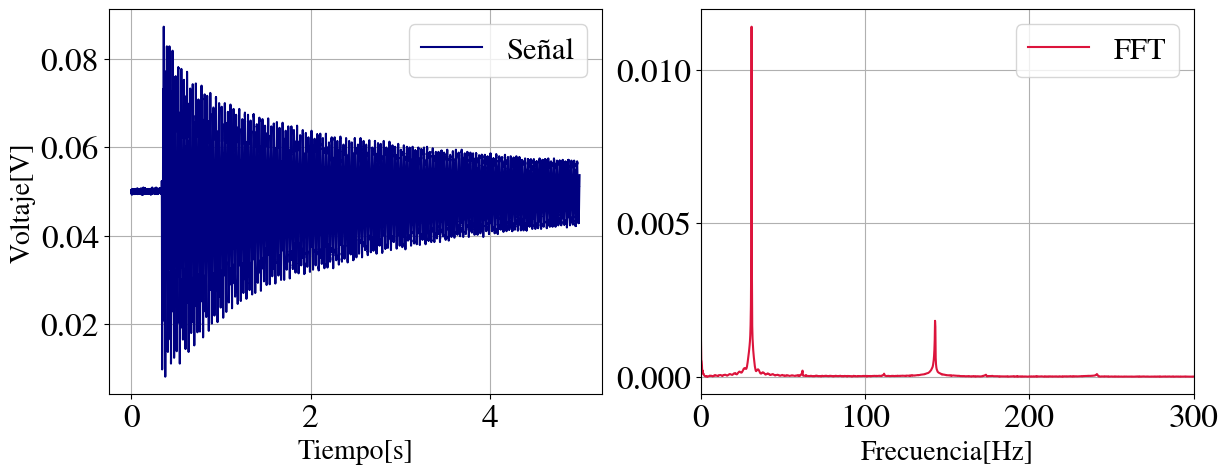

In [ ]:
fig, axs = plt.subplots(1,2, figsize= (14,5))
axs[0].plot(tiempo, voltaje, color = 'navy', label = 'Señal')
axs[0].set_ylabel('Voltaje[V]')
axs[0].set_xlabel('Tiempo[s]')
axs[0].legend()

axs[1].plot(frec[1:N//2], fft2[1:N//2], color = 'crimson', label = 'FFT')
axs[1].set_xlabel('Frecuencia[Hz]')
axs[1].set_xlim(0,300)
axs[1].legend()

plt.show()

##Probando a ver si cortando al principio se va el pico del 0

(0.34, 0.5)

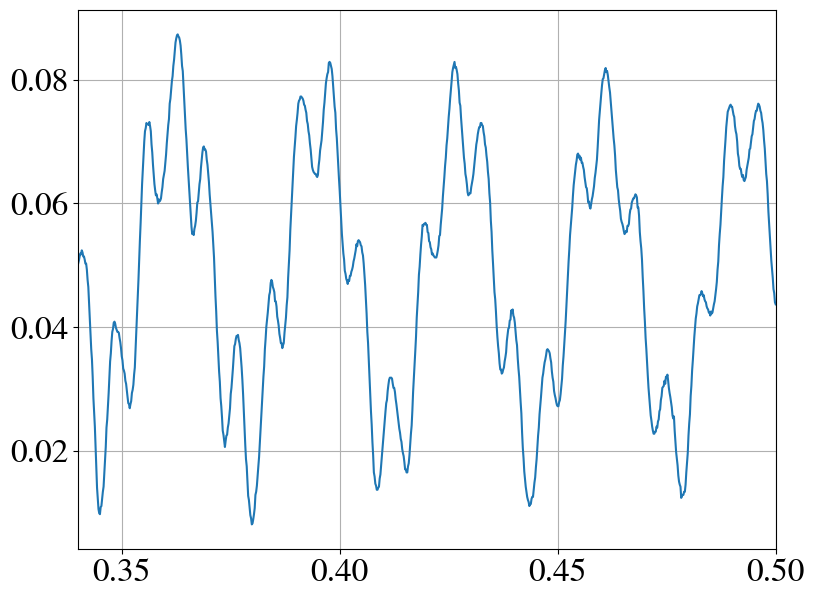

In [ ]:
inicio = int(0.34*6000) #aprox donde arranca
plt.plot(tiempo[inicio:], voltaje[inicio:])
plt.xlim(0.34,0.5)


In [ ]:

voltaje_recortado = voltaje[inicio:]
tiempo_recortado = tiempo[inicio:]

#calculo las tranformadas

N_recortado = len(tiempo_recortado)
frec_muestreo = 6000

# Hacer la FFT
fft_recortado = np.fft.fft(voltaje_recortado)


# Tomamos solo la primera mitad y normalizamos.
 #2/N_recortado normaliza, como no tenemos el dt es necesario agregar unidades a mano
 #agarramos la primera mitad para que no salga el patron repetido, sino toma frecuencias positivas y negativas asociadas
fft2_recortado = 2.0/N_recortado * np.abs(fft_recortado)


# Calular el vector de frecuencias.
frec_recortado = np.arange(0,frec_muestreo,1/max(tiempo_recortado))


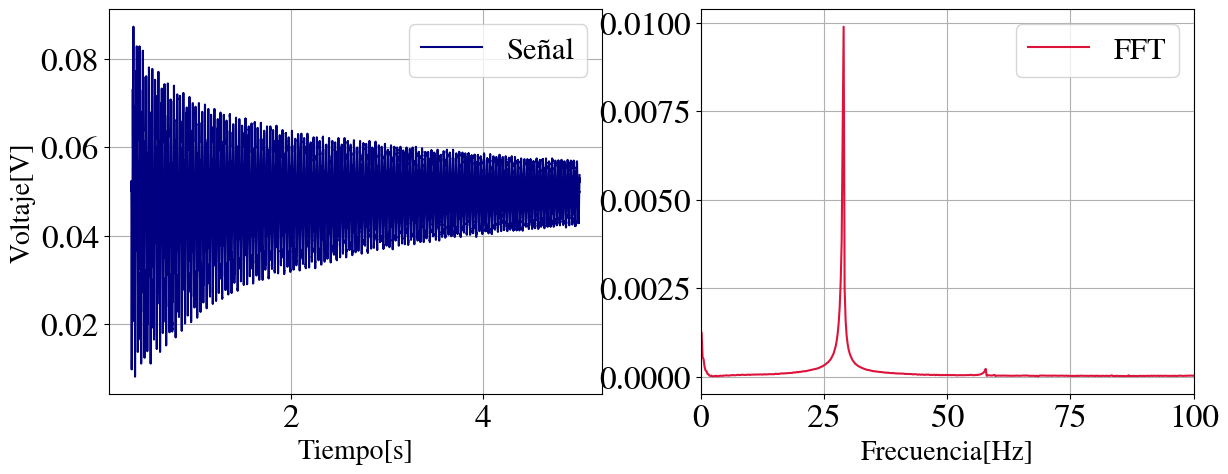

In [ ]:
fig, axs = plt.subplots(1,2, figsize= (14,5))
axs[0].plot(tiempo_recortado, voltaje_recortado, color = 'navy', label = 'Señal')
axs[0].set_ylabel('Voltaje[V]')
axs[0].set_xlabel('Tiempo[s]')
axs[0].legend()

axs[1].plot(frec_recortado[1:N_recortado//2], fft2_recortado[1:N_recortado//2], color = 'crimson', label = 'FFT')
axs[1].set_xlabel('Frecuencia[Hz]')
axs[1].set_xlim(0,100)
axs[1].legend()

plt.show()

tal vez estaría bueno usar los picos para modelar el decaimiento, siento que ajustar la función a secas le va a costar una banda

## Calculo los picos de las frecuencias

In [ ]:
picos, diccionario = find_peaks(fft2_recortado[:N_recortado//2],prominence = 2e-05,  width = 0.05, distance = 100)
frec_recortado[picos]

array([  29. ,   57.8,   83.4,  104. ,  133. ,  161.8,  224.6,  925.6,
       1802.6, 1942. , 2481. ])

In [ ]:
plt.plot(frec_recortado[1:N_recortado//2], fft2_recortado[1:N_recortado//2])
plt.plot(frec_recortado[picos], fft2_recortado[picos], marker = 'o', linestyle = '')

plt.xlim(0,50)
#plt.ylim(0,0.0002)

(0.0, 50.0)

In [ ]:
print(f' los picos de frecuencias hallados son {frec_recortado[picos]}')

 los picos de frecuencias hallados son [  29.    57.8   83.4  104.   133.   161.8  224.6  925.6 1802.6 1942.
 2481. ]


#Decaimiento

In [ ]:
picos_voltaje, diccionario_voltaje = find_peaks(voltaje, height = 0.05, distance = 62)

In [ ]:
plt.plot(tiempo, voltaje)
plt.plot(tiempo[picos_voltaje[25:]], voltaje[picos_voltaje[25:]], marker = 'o', linestyle = '')
plt.plot(tiempo[picos_voltaje[23]], voltaje[picos_voltaje[23]], color = 'black', marker = 'o')
#plt.xlim(0,0.5)

In [ ]:
voltaje_decaimiento = voltaje[picos_voltaje[25:len(picos_voltaje)-1]]
tiempo_decaimiento = tiempo[picos_voltaje[25:len(picos_voltaje)-1]]-tiempo[picos_voltaje[25]]

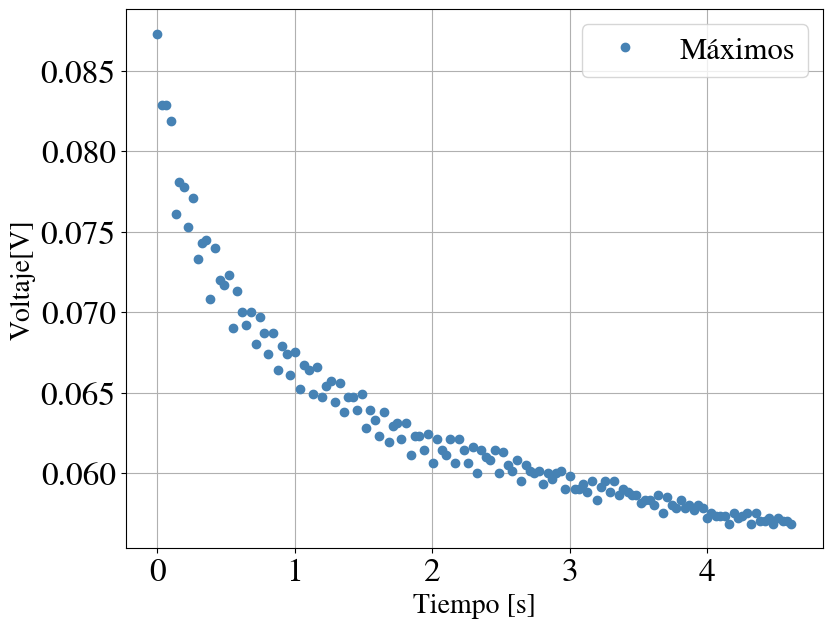

In [ ]:
plt.plot(tiempo_decaimiento, voltaje_decaimiento, marker = 'o', linestyle = '', label = 'Máximos', color = 'steelblue')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje[V]')
plt.legend()
plt.show()

In [ ]:
def exponencial(x,A,b,c,d):
    return A*np.exp((x-d)*b)+c

p_ini = [0.087289-voltaje[picos_voltaje[23]], -0.9, voltaje[picos_voltaje[23]], 0]
popt, pcov = curve_fit(exponencial, tiempo_decaimiento, voltaje_decaimiento, absolute_sigma = False, p0 = p_ini )
amplitud, decaimiento, c, t0 = popt
amplitd_err, decaimiento_err, c_err,to_err = np.sqrt(np.diag(pcov))
decaimiento, decaimiento_err

(np.float64(-0.9443102939265368), np.float64(0.03490548530595628))

In [ ]:
c-voltaje[picos_voltaje[23]]

np.float64(0.007337429121952857)

In [ ]:
suave = np.linspace(min(tiempo_decaimiento), max(tiempo_decaimiento), 10000)

plt.plot(tiempo_decaimiento, voltaje_decaimiento, marker = 'o', linestyle = '', label = 'Máximos', color = 'steelblue')
plt.plot(suave, exponencial(suave, amplitud, decaimiento, c,t0), color = 'navy', label = 'Ajuste')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje[V]')
plt.legend()
plt.show()

## Pruebo calcular E a ver si da cosas con sentido

Asumiendo que el primer modo está en 31.13 y el decaimiento es el hallado, podemos calcular E


In [ ]:
def dens_lineal(d, rho):
    return rho*np.pi*(d/2)**2
def momento(d):
    return np.pi*(d**4)/64

k1_L = 1.875104
k2_L = 4.694091
k3_L = 7.854757
k4_L = 10.995541

#defino variables con los datos


rho_cobre = 8960
L_cobre = 261*10**(-3)
error_L_cobre = 1*10**(-3)
d_cobre = 5*10**(-3)
error_d_cobre = 0.05*10**(-3)
f1 = 31.13
f1_teorico = 39

def modulo_young(f, I, rho, k, alfa, L):
    E = ((f*2*np.pi)**2 + alfa**2)*((rho*(L**4))/(I*(k**4)))
    return E

E_teorico = modulo_young(f1_teorico, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,decaimiento, L_cobre)
E = modulo_young(f1, momento(d_cobre), dens_lineal(d_cobre, rho_cobre), k1_L,decaimiento, L_cobre)

print(f'el valor esperado es {E_teorico*10**(-9):.2f}GPa y el obtenido {E*10**(-9):.2f}GPa')


el valor esperado es 129.25GPa y el obtenido 82.35GPa
